In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# Load the dataset
data = pd.read_csv("advertising_Data1.csv")

In [40]:
# Display the first few rows of the dataset
data.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Employee,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,Ram,7164
1,702.97,296.53,558.13,180.55,781.06,132.43,Hari,5055
2,313.14,295.94,642.96,505.71,438.91,464.23,Shyam,6154
3,898.52,61.27,548.73,240.93,278.96,432.27,Krishna,5480
4,766.52,550.72,651.91,666.33,396.33,841.93,Mohan,9669


In [41]:
# Check for null values in the dataset
data.isnull().sum()

TV                       0
Billboards               0
Google_Ads               0
Social_Media             0
Influencer_Marketing     0
Affiliate_Marketing      0
Employee                11
Product_Sold             0
dtype: int64

In [42]:
if 'Employee' in data.columns:
    data.drop('Employee', axis=1, inplace=True)

In [43]:
data.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164
1,702.97,296.53,558.13,180.55,781.06,132.43,5055
2,313.14,295.94,642.96,505.71,438.91,464.23,6154
3,898.52,61.27,548.73,240.93,278.96,432.27,5480
4,766.52,550.72,651.91,666.33,396.33,841.93,9669


In [44]:
# Scatter plots with trendlines
fig_tv = px.scatter(data, x="Product_Sold", y="TV", size="TV", trendline="ols", title='TV vs Product Sold')
fig_billboards = px.scatter(data, x='Product_Sold', y='Billboards', size='Billboards', trendline='ols', title='Billboards vs Product Sold')
fig_google_ads = px.scatter(data, x='Product_Sold', y='Google_Ads', size='Google_Ads', trendline='ols', title='Google Ads vs Product Sold')
fig_social_media = px.scatter(data, x='Product_Sold', y='Social_Media', size='Social_Media', trendline='ols', title='Social Media vs Product Sold')
fig_influencer_marketing = px.scatter(data, x='Product_Sold', y='Influencer_Marketing', size='Influencer_Marketing', trendline='ols', title='Influencer Marketing vs Product Sold')
fig_affiliate_marketing = px.scatter(data, x='Product_Sold', y='Affiliate_Marketing', size='Affiliate_Marketing', trendline='ols', title='Affiliate Marketing vs Product Sold')

In [45]:
fig_tv.show()
fig_billboards.show()
fig_google_ads.show()
fig_social_media.show()
fig_influencer_marketing.show()
fig_affiliate_marketing.show()


In [7]:
# Calculate and display correlations
correlation = data.corr()
print(correlation['Product_Sold'].sort_values(ascending=False))

Product_Sold            1.000000
Affiliate_Marketing     0.611603
Billboards              0.480593
Social_Media            0.401088
TV                      0.374228
Google_Ads              0.203678
Influencer_Marketing    0.140844
Name: Product_Sold, dtype: float64


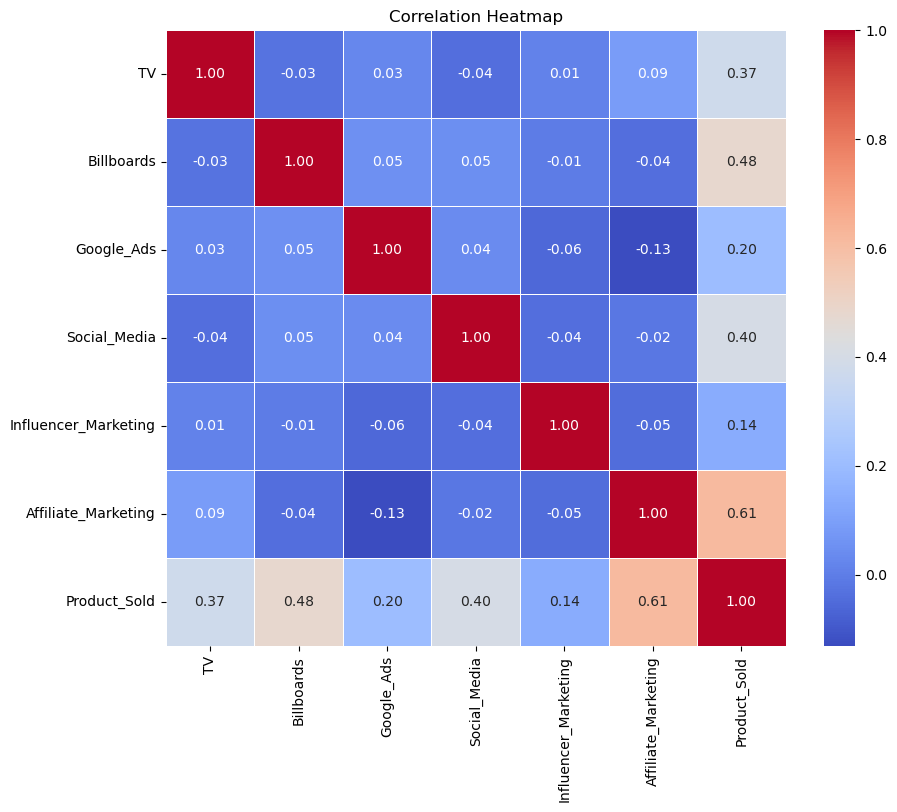

In [12]:
# Create a heatmap for the correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [46]:
# Prepare data for linear regression
x = np.array(data[['TV', 'Billboards', 'Google_Ads', 'Social_Media', 'Influencer_Marketing', 'Affiliate_Marketing']])
y = np.array(data['Product_Sold'])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [47]:
# Display the shapes of train and test sets
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(210, 6)
(90, 6)
(210,)
(90,)


In [48]:
# Train a linear regression model
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [49]:
# Evaluate the model
print('R-squared score on the test set:', model.score(xtest, ytest))

R-squared score on the test set: 0.9999659903345287


In [50]:
# Predict future sales
TV = 241
BiBo = 638
GooAd = 224
SoMe = 250
InfMar = 445
AffMar = 1110
future_sales = np.array([[TV, BiBo, GooAd, SoMe, InfMar, AffMar]])
predicted_sales = model.predict(future_sales)
print('Number of Products Sold:', predicted_sales)

Number of Products Sold: [8327.08550227]
